In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from puzzle_solver import plot
from puzzle_solver.tile_detector import detect_tiles

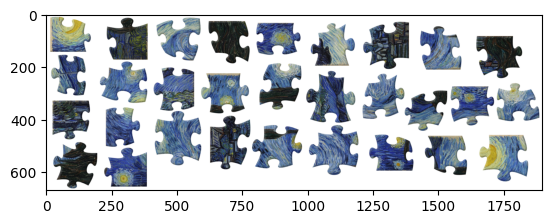

In [3]:
img = cv2.imread("../samples/van-gogh.png")
plot(img)

In [4]:
output = img.copy()

In [5]:
boxes, centroids, num_labels, labels = detect_tiles(img)

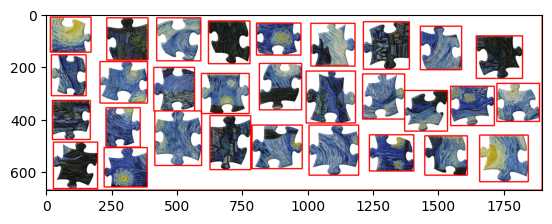

In [16]:
for box in boxes:
    cv2.rectangle(output, box[0], box[1], (0, 0, 255), 3)
plot(output)

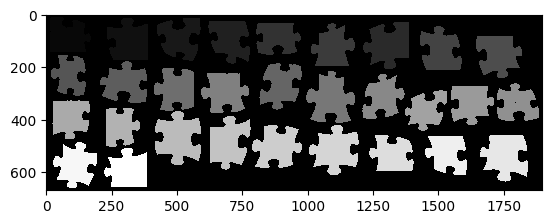

In [17]:
labels_image = np.uint8(labels / num_labels * 255)
plot(labels_image)

In [18]:
# Get contours
"""contours est une liste de liste où chaque liste correspond à un contour et chaque sous-liste est composée de deux éléments et correspond à un pixel"""
contours, hierarchy = cv2.findContours(labels_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("number of puzzle pieces :", len(contours))

## Draw contours
#contours_image = np.zeros_like(img)
#cv2.drawContours(contours_image, contours, -1, (0, 255, 0), 2)
#
## Print contours
#cv2.imshow("Contours", contours_image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

number of puzzle pieces : 30


### get polar coord

In [54]:
import math

def get_polar_coord(x,y,x_0,y_0):
    rho = math.sqrt((x-x_0)**2 + (y-y_0)**2)
    theta = math.atan2(y-y_0, x-x_0)
    # convertir l'angle en degrés si nécessaire : 
    #theta_degrees = math.degrees(theta)
    return (rho, theta)

In [62]:
polar_coord = []
for i in range(len(centroids)-1):
    # On commence à i+1 car la 1ere cooronées de centroides = centres de l'image totale ? 
    polar_coord.append([i+1,[]])
    x_0 = round(centroids[i+1][0],0)
    y_0 = round(centroids[i+1][1],0)
    for num_pixel in range(len(contours[i])):
        x = contours[i][num_pixel][0][0]
        y = contours[i][num_pixel][0][1]
        (rho, theta) = get_polar_coord(x,y,x_0,y_0)
        polar_coord[i][1].append((rho,theta))
        
polar_coord

[[1,
  [(482.36500702269024, 1.073765947762228),
   (482.76909594546333, 1.0765743742687617),
   (479.95208094142066, 1.0875799206209262),
   (480.37485362995426, 1.090390510211853),
   (478.99582461645736, 1.0959447048378135),
   (479.42986974113325, 1.0987533926499173),
   (478.5237716143264, 1.1024758546097948),
   (478.9665959124916, 1.105281306332669),
   (478.07217028394365, 1.1090196230012703),
   (478.5237716143264, 1.1118215809783862),
   (478.08158299604054, 1.1136968000695728),
   (480.88460154178364, 1.1304003406045535),
   (481.78937306669604, 1.1312851624380824),
   (482.2706708892839, 1.1340439007913554),
   (487.71405556944944, 1.1392477805704062),
   (489.0408980852215, 1.1382457348871406),
   (489.9489769353539, 1.1391013094785702),
   (492.603288661373, 1.137112499173448),
   (493.51089147049225, 1.1379639828943642),
   (497.49472359011, 1.1350191971348522),
   (498.4014446206993, 1.135866135049403),
   (499.7299270606074, 1.1348945053454473),
   (500.6365947471279, 